In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, auc, roc_curve
from matplotlib.pyplot import figure

sns.set() # Setting seaborn as default style even if use only matplotlib

Text(0.5, 0.98, 'A single ax with no data')

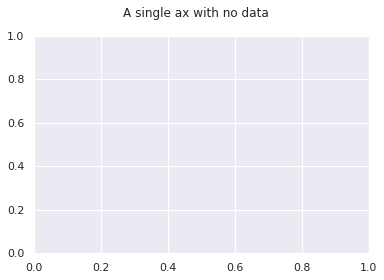

In [2]:
fig, ax = plt.subplots()
fig.suptitle('A single ax with no data')

In [5]:
np.random.rand(10)

array([0.35912191, 0.10851775, 0.94907865, 0.91718983, 0.41798625,
       0.24698669, 0.62245135, 0.15922352, 0.238881  , 0.37286583])

Text(0.5, 1.0, 'second')

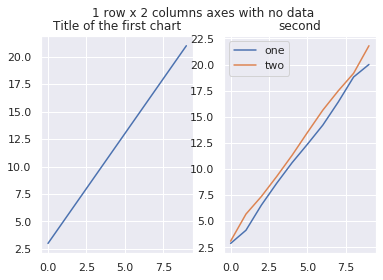

In [8]:
x = np.array(range(0,10))
error = np.random.rand(10)

y = 2*x +3
y1 = y - error
y2 = y + error * 0.8

fig, ax = plt.subplots(1, 2)
fig.suptitle('1 row x 2 columns axes with no data')
ax[0].plot(x,y)

ax[0].set_title('Title of the first chart')
ax[1].plot(x,y1)
ax[1].plot(x,y2)
ax[1].legend(['one','two'])
ax[1].set_title('second')

In [9]:
data = pd.read_csv('~/work/project/not_conflict/r_noconflict/0730/original/dominant_comparison.tsv', sep = '\t')

In [10]:
data

,result,logistic,svm,boosting,opposite_model,omit_model
0,0,0.056805,-1.240975,-0.896808,-3.348142,-1.376754
1,0,0.015027,-2.305266,-4.082787,-5.421150,-3.002903
2,1,0.945310,1.546526,2.656577,2.979834,3.223028
3,1,0.889233,0.871057,0.734799,4.903363,2.602514
4,1,0.934011,1.702698,2.875863,2.730264,2.369629
...,...,...,...,...,...,...
190,1,0.983708,2.425677,4.605025,0.600090,3.971966
191,1,0.985195,1.777817,2.856986,3.485283,3.327735
192,0,0.210832,-0.949794,-2.297616,-2.548894,-2.321189
193,0,0.145422,-0.920632,0.204052,-2.560930,-1.206831


In [11]:
fpr, tpr, thresholds = roc_curve(data['result'], data['svm'])
roc_auc = auc(fpr,tpr)

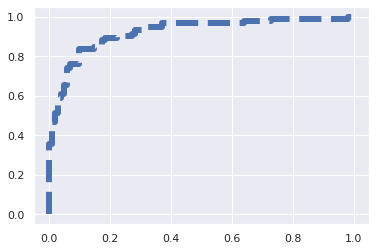

In [12]:
plt.plot(fpr, tpr, lw = 6, linestyle = '--', label = ', (AUC = %0.3f)'%roc_auc)

Text(0.5, 1.0, 'ROC')

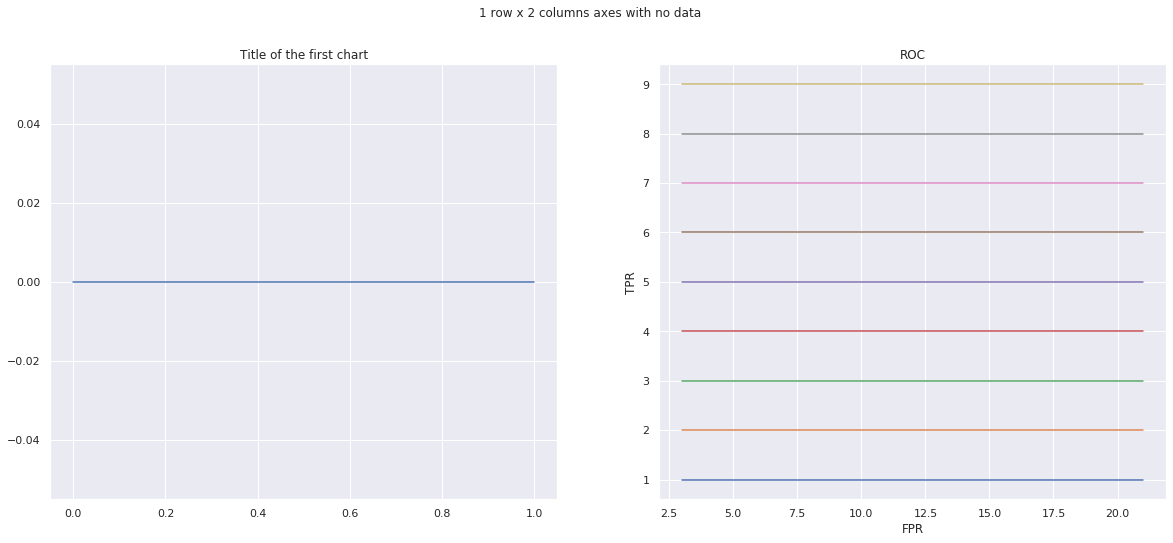

In [31]:
# fpr, tpr, thresholds = roc_curve(y,y1)
# roc_auc = auc(fpr, tpr)
plt.rcParams['figure.figsize'] = [20,8]
fig, ax = plt.subplots(1, 2)
fig.suptitle('1 row x 2 columns axes with no data')
ax[0].plot(data['result'], [0]*len(data['result']))

ax[0].set_title('Title of the first chart')

#ax[1].plot(x,y1, linestyle = '--', lw = 1)
ax[1].plot(fpr, tpr, lw = 2, linestyle = '-', label = ', (AUC = %0.3f)'%roc_auc)
ax[1].plot(fpr, tpr, lw = 3, linestyle = '--', label = ', (AUC = %0.3f)'%roc_auc)

for i in range(1, 10):
    ax[1].plot(y, [i]10)

ax[1].set_xlabel('FPR')
ax[1].set_ylabel('TPR')
ax[1].legend(loc='lower right')
ax[1].set_title('ROC')

In [37]:
def get_ROC_val(data, ytest_col, ytest_hat_col):
    fpr, tpr, thresholds = roc_curve(data.iloc[:,ytest_col], data.iloc[:,ytest_hat_col])
    auroc = auc(fpr,tpr)
    return(fpr, tpr, auroc)

In [34]:
data.columns

Index(['result', 'logistic', 'svm', 'boosting', 'opposite_model',
       'omit_model'],
      dtype='object')

In [23]:
a, b, c = get_ROC_val(data, 0,2)

In [42]:
for i in range(1,6):
    fpr, tpr, auroc = get_ROC_val(data, 0, i)
    print(auroc)

0.9331996623047699
0.9213803292528493
0.9570493879273955
0.9047066272688897
0.9458632334318278


In [ ]:
def drawROC(ytest, ytest_hat, lw=3, linestyle = '--', label = '', lastone = False, MoreThanOnelocation = 'lower right', fontsize = 12, title = '', legendloc = False):
    fpr, tpr, thresholds = roc_curve(ytest, ytest_hat)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr, tpr, lw = lw, linestyle = linestyle, label = label + ', (AUC = %0.3f)'%roc_auc)
    if lastone == True:
        if legendloc != False:
            ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=lengend,borderaxespad=0, frameon=False)
        else:
            plt.legend(loc = 'lower right', fontsize = 12)
        plt.title(title)
        
        fig = plt.figure()
        return(fig)


Text(0.5, 1.0, 'ROC')

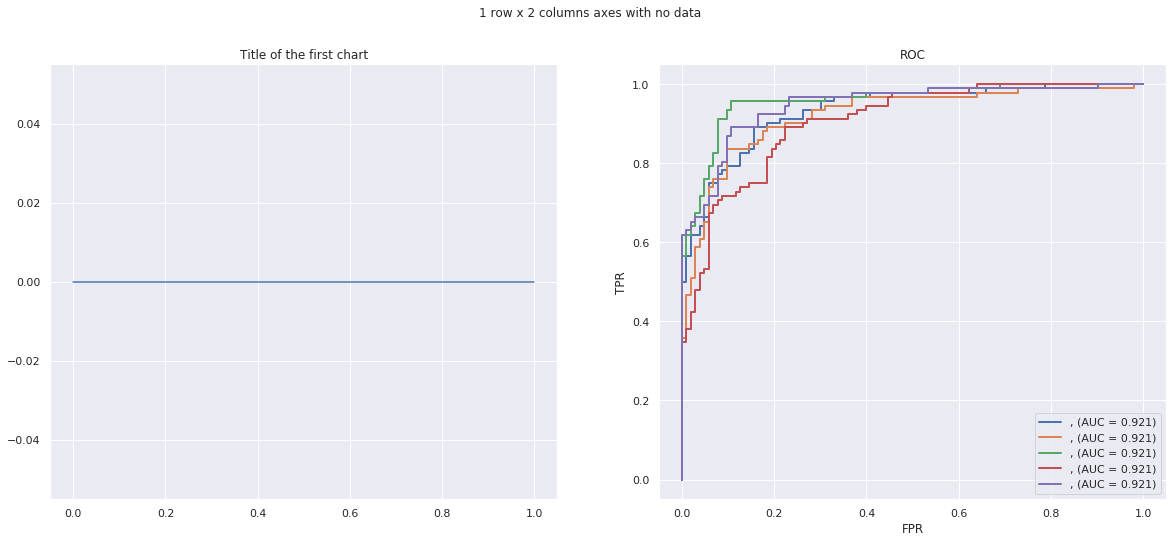

In [43]:
plt.rcParams['figure.figsize'] = [20,8]
fig, ax = plt.subplots(1, 2)
fig.suptitle('1 row x 2 columns axes with no data')
ax[0].plot(data['result'], [0]*len(data['result']))

ax[0].set_title('Title of the first chart')

#ax[1].plot(x,y1, linestyle = '--', lw = 1)
for i in range(1,6):
    fpr, tpr, auroc = get_ROC_val(data, 0, i)
    ax[1].plot(fpr, tpr, lw = 2, linestyle = '-', label = ', (AUC = %0.3f)'%roc_auc)

ax[1].set_xlabel('FPR')
ax[1].set_ylabel('TPR')
ax[1].legend(loc='lower right')
ax[1].set_title('ROC')

In [44]:
def get_ROC_val(data, ytest_col, ytest_hat_col, ax):
    fpr, tpr, thresholds = roc_curve(data.iloc[:,ytest_col], data.iloc[:,ytest_hat_col])
    auroc = auc(fpr,tpr)
    ax.plot(fpr, tpr, lw = 2, linestyle = '-', label = ', (AUC = %0.3f)'%roc_auc)
    #return(fpr, tpr, auroc)

Text(0.5, 1.0, 'ROC')

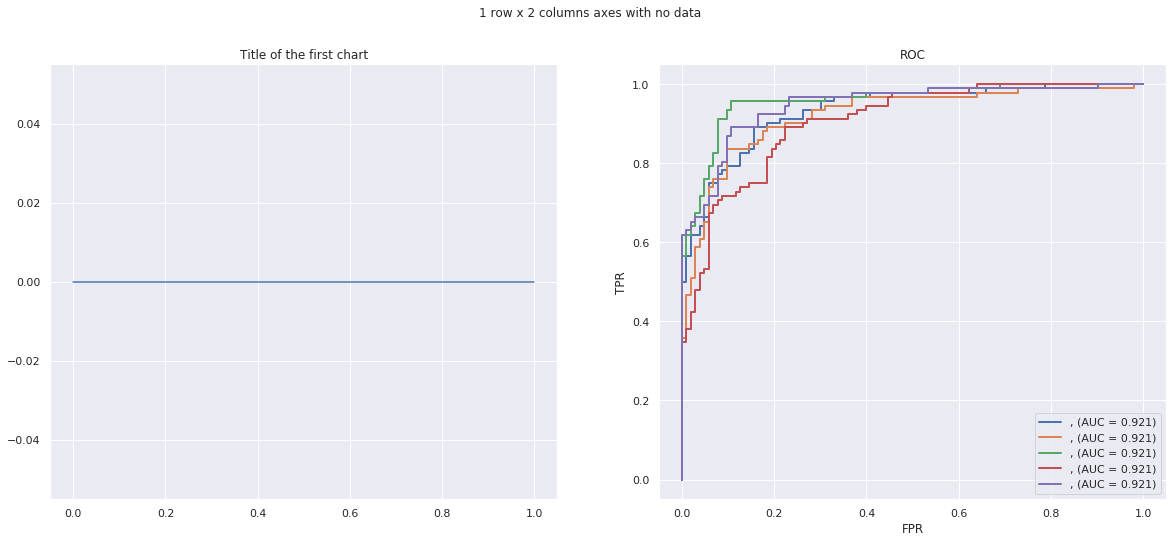

In [46]:
plt.rcParams['figure.figsize'] = [20,8]
fig, ax = plt.subplots(1, 2)
fig.suptitle('1 row x 2 columns axes with no data')
ax[0].plot(data['result'], [0]*len(data['result']))

ax[0].set_title('Title of the first chart')

#ax[1].plot(x,y1, linestyle = '--', lw = 1)
# for i in range(1,6):
#     fpr, tpr, auroc = get_ROC_val(data, 0, i)
#     ax[1].plot(fpr, tpr, lw = 2, linestyle = '-', label = ', (AUC = %0.3f)'%roc_auc)

for i in range(1,6): 
    get_ROC_val(data, 0, i, ax[1])

ax[1].set_xlabel('FPR')
ax[1].set_ylabel('TPR')
ax[1].legend(loc='lower right')
ax[1].set_title('ROC')